https://archive.ics.uci.edu/ml/datasets/wholesale+customers

January Sales Data

In [1]:
import pandas as pd

url = "https://hadoop-and-big-data.s3-us-west-2.amazonaws.com"
url += "/purchase-history/customer-purchases-2018-01.json"
january_sales = pd.read_json(url)

In [2]:
january_sales.head()

,category,customer,item,price,product_number,purchase_time
0,Fresh,0,Driscoll - Berry Raspberries Red Conventional ...,2.99,57,2018-01-01 14:50:00
1,Fresh,0,Baby Carrots - 1 lb,1.29,45,2018-01-01 14:50:00
2,Fresh,0,La Panzanella - Croccantini Rosemary,1.99,31,2018-01-01 14:50:00
3,Fresh,0,Blueberries - 6 oz,2.50,50,2018-01-01 14:50:00
4,Fresh,0,Leeks Organic - 1 Bunch,2.99,60,2018-01-01 14:50:00


Exploratory Data Analysis

In [3]:
print(january_sales.shape)
print(january_sales.columns)
print(january_sales.category.unique())

(37872, 6)
Index(['category', 'customer', 'item', 'price', 'product_number',
       'purchase_time'],
      dtype='object')
['Fresh' 'Milk' 'Grocery' 'Frozen' 'Detergents_Paper' 'Delicatessen']


Create the category grouping.

In [4]:
category_grouping = january_sales.groupby('category')
category_grouping[['item']].count()

,item
category,
Delicatessen,1661
Detergents_Paper,2077
Fresh,16344
Frozen,1712
Grocery,9492
Milk,6586


In [5]:
category_grouping[['price']].sum()

,price
category,
Delicatessen,10094.86
Detergents_Paper,16482.01
Fresh,62296.05
Frozen,9513.98
Grocery,45035.06
Milk,34409.54


In [6]:
aggregate = (category_grouping[['item','price']]
             .agg({'item':'count','price':'sum'}))

aggregate.columns = ['item count', 'total purchases']
aggregate

,item count,total purchases
category,,
Delicatessen,1661,10094.86
Detergents_Paper,2077,16482.01
Fresh,16344,62296.05
Frozen,1712,9513.98
Grocery,9492,45035.06
Milk,6586,34409.54


In [7]:
aggregations_to_use = {'item':'count', 'price':'sum', 'customer':('min','max')}

aggregate = (category_grouping[['item','price','customer']]
             .agg(aggregations_to_use))

aggregate.columns = ['item count', 'total purchases', 'customer min', 'customer max']
aggregate

,item count,total purchases,customer min,customer max
category,,,,
Delicatessen,1661,10094.86,0,49
Detergents_Paper,2077,16482.01,0,49
Fresh,16344,62296.05,0,49
Frozen,1712,9513.98,0,49
Grocery,9492,45035.06,0,49
Milk,6586,34409.54,0,49


How much did each customer spent per category?

In [8]:
category_customer_grouping = january_sales.groupby(['customer','category'])

In [9]:
january_spending_by_category = category_customer_grouping[['price']].sum().unstack()
january_spending_by_category.head()

price                                                  
category Delicatessen Detergents_Paper    Fresh  Frozen Grocery    Milk
customer                                                               
0              113.81           224.00  1063.34   19.96  630.01  807.55
1              152.75           279.51   588.82  149.65  802.44  818.90
2              655.01           294.46   529.89  205.24  642.72  734.90
3              154.78            42.91  1108.36  536.53  353.60  103.28
4              433.35           150.05  1888.81  328.61  602.36  456.75

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/Users/kousukemaeda/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/kousukemaeda/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


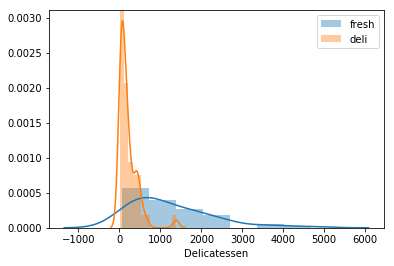

In [11]:
sns.distplot(january_spending_by_category['price']['Fresh'], label='fresh')
sns.distplot(january_spending_by_category['price']['Delicatessen'], label='deli')
plt.legend()

In [17]:
ls

Class-Project-Redux.ipynb
Titanic Survival Prediction.ipynb
Titanic Survival Rate Prediction (Real).ipynb
Untitled.ipynb
data/


In [14]:
mkdir data

In [15]:
january_spending_by_category.to_csv('data/spending_by_cat-2018-01.csv')

Automation

In [18]:
def full_pipe(month):
    url = 'https://hadoop-and-big-data.s3-us-west-2.amazonaws.com'
    url += f'/purchase-history/customer-purchases-2018-{month}.json'
    sales = pd.read_json(url)
    category_customer_grouping = sales.groupby(['customer', 'category'])
    spending_by_cat = category_customer_grouping[['price']].sum().unstack()
    spending_by_cat.to_csv(f'data/spending_by_cat-2018-{month}.csv')
                           
full_pipe('02')

In [19]:
ls data

spending_by_cat-2018-01.csv  spending_by_cat-2018-02.csv
